# South African Language Identification Hack 2022

© Explore Data Science Academy

---
### Honour Code

I {**Joshua, Olalemi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview:

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government
<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media"
     alt="South Africa's Languages"
     style="float: center; padding-bottom=0.5em"
     width=800px/>


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, I imported and briefly discussed the libraries that I used throughout the analysis and modelling. |

---

In [4]:
#Come back and regroup the imports accordingly
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd #This will be used for data loading and manipulation
import numpy as np # This will be used for linear algebra on data
import seaborn as sns 
import matplotlib.pyplot as plt #This will be used for data visualization
from matplotlib import rc
%matplotlib inline


# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings('ignore')
# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, I loaded the "train" and "test" datasets into different DataFrames. |

---

In [8]:
df_train = pd.read_csv("train_set.csv") # load the train data

df_test = pd.read_csv("test_set.csv") # load the  test data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, I performed an in-depth analysis of all the variables in the DataFrame.|

---


In [16]:
df_train #This is to have an overview of the trains data.

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


Looking at the top five and bottom five rows of our data we can see some of our features as well as the types of data we are working with.

It is observed that it contains 2 columns: "lang_id" & "text".
The "lang_id" is the language class the text belongs to; while the "text" column contains the actual text in a South African language.


Let's also have an overview of the test data below.


In [15]:
df_test #This is to have an overview of the trains data.

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


From the above result, it can be seen that though the test data also has two(2) columns ("index" & "text"), it doesn't contain the "lang_id" column (like the train dataset). This is normal because that is what we want to get in this hackathon.

Therefore, our focus will be on the trains dataset.

And to proceed further with the exploration of the data, since we know that null values and non-numerical data types (called "object") affect Machine Learning (ML) models, let's check if any of these are present in the train data.

In [37]:
#This will print the total null values in the dataset and the data types of the data in the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Well, fortunately for us, it appears that there are no null values in the data (strange but true). But there is a big "BUT" here. The data type of the contents in the dataset is "object" (texts.). Let's not worry about that for now; it will be dealt with later.

As an *Explorer*, let's keep exploring 😄.



The next thing we want to explore is the unique languages and their number. This will help us know if `resamplign` will need to be done.

In [59]:
#This will return a list of the unique texts in the lang_id column and the number of times they appeared

print('The total number of unique entries in lang_id columns is:', len(df_train['lang_id'].unique()), "which are seen below:")
df_train['lang_id'].value_counts()

The total number of unique entries in lang_id columns is: 11 which are seen below:


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Wow, I'm shocked right now! It appears that there are 11 unique entries and they are all balanced. Let me visualize this on a plot.

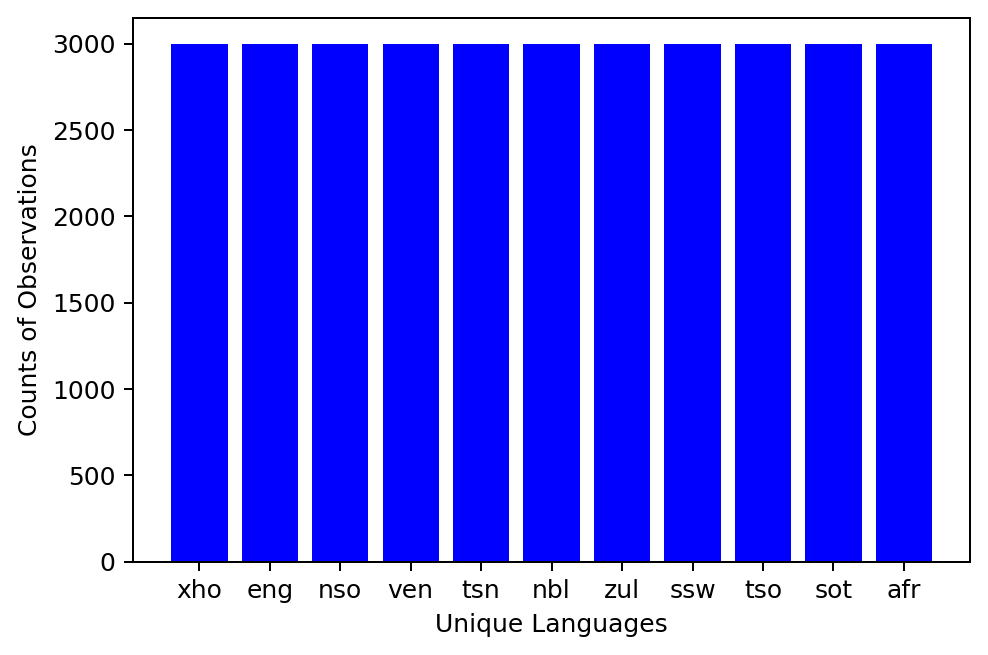

In [84]:
# Get all possible labels
labels = df_train['lang_id'].unique()
heights = df_train['lang_id'].value_counts()
plt.bar(labels,heights,color='blue')
plt.xlabel("Unique Languages")
plt.ylabel("Counts of Observations")
plt.show()

Strange but true, the data is evenly distributed across.

Therefore, without much aado, let's now proceed to engineer the data.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, I engineered the dataset by cleaning it and also adding new features - as identified in the EDA phase. |

---

In [15]:
# remove missing values/ features

In [16]:
# create new features

In [17]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, I created several Machine Learning (ML) models to classify the languages accordingly. |

---

In [18]:
# split data

In [19]:
# create targets and features dataset

In [20]:
# create one or more ML models

In [21]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, I compared the relative performance of the various trained ML models on a holdout dataset and gave a brief comment on what model is the best and why. |

---

In [22]:
# Compare model performance

In [23]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| This is where I explained the chosen model and briefly discussed how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [24]:
# discuss chosen methods logic